# Feature Selection using Factor Analysis


https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


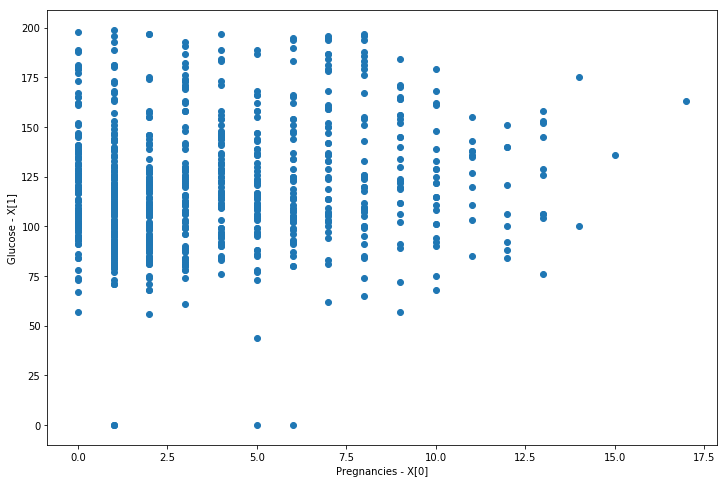

In [4]:
figure = plt.figure(figsize = (12, 8))

plt.scatter(diabetes_df.iloc[:,0], diabetes_df.iloc[:,1], cmap = 'Spectral')

plt.xlabel('Pregnancies - X[0]')
plt.ylabel('Glucose - X[1]');

In [5]:
FEATURES = list(diabetes_df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [6]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

## Factor Analysis
* Factor analysis is a technique that is used to reduce a large number of variables into fewer numbers of factors.
* The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important.
* The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. 
* n_components : Dimensionality of latent space, the number of components of X that are obtained after transform.
* random_state : If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. 

In [7]:
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components = n, random_state = 10)
    x_new = fact_a.fit_transform(x, y)
        
    return fact_a, pd.DataFrame(x_new)

## Build model


In [8]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

In [9]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

In [10]:
def build_model(name_of_y_col, 
                names_of_x_cols, 
                dataset,
                *hyperparameters):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall}    

In [11]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc)

    pylab.ylim([0,1])

    plt.xlabel('n components')
    plt.ylabel('accuracy');

In [12]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['n_components - ' + str(i)] = build_model('class',
                                                           FEATURES,
                                                           diabetes_df,
                                                           i)

In [13]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.5909090909090909
precision_score :  1.0
recall_score :  0.015625

Test:  n_components - 2

accuracy_score :  0.7727272727272727
precision_score :  0.71875
recall_score :  0.46938775510204084

Test:  n_components - 3

accuracy_score :  0.7467532467532467
precision_score :  0.6904761904761905
recall_score :  0.5272727272727272

Test:  n_components - 4

accuracy_score :  0.7207792207792207
precision_score :  0.5405405405405406
recall_score :  0.43478260869565216

Test:  n_components - 5

accuracy_score :  0.7337662337662337
precision_score :  0.6842105263157895
recall_score :  0.4727272727272727

Test:  n_components - 6

accuracy_score :  0.7532467532467533
precision_score :  0.6818181818181818
recall_score :  0.5555555555555556

Test:  n_components - 7

accuracy_score :  0.7207792207792207
precision_score :  0.6041666666666666
recall_score :  0.5471698113207547

Test:  n_components - 8

accuracy_score :  0.7922077922077922
precision_score :  0

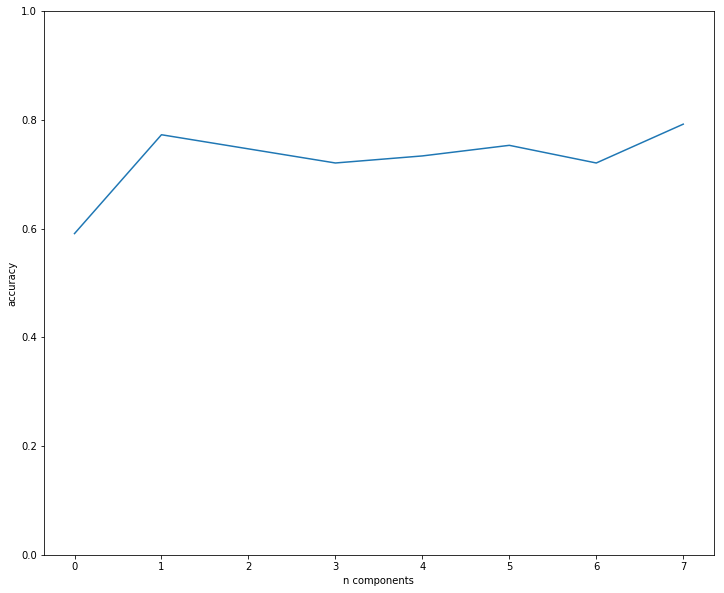

In [14]:
visualize_results(result_dict)

## fit_transform

* Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
* Parameters: Training set, Target values.

* Returns: A numpy array of shape [n_samples, n_features_new] i.e. transformed array.
* components_ : Components with maximum variance.

* loglike_ : The log likelihood at each iteration.

* noise_variance_ : The estimated noise variance for each feature.


In [15]:
fa_obj_final = result_dict['n_components - 2']['fact_a_obj']

In [16]:
print(fa_obj_final.noise_variance_)

[1.09624791e+01 1.28409382e+01 3.64578608e+02 2.03475597e+02
 2.01914855e+00 5.79365953e+01 1.05156608e-01 1.25615935e+02]


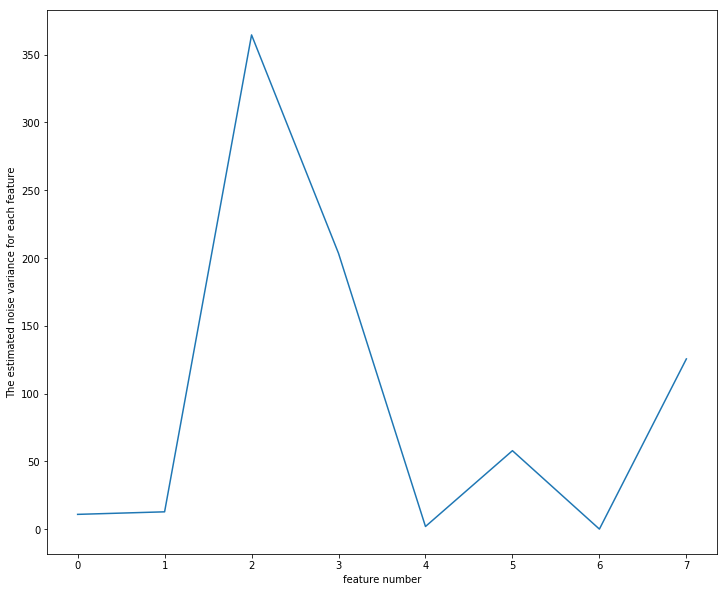

In [17]:
feature_num = list(range(0, 8))

plt.figure(figsize = (12, 10))
plt.plot(feature_num, fa_obj_final.noise_variance_)

plt.xlabel('feature number')
plt.ylabel('The estimated noise variance for each feature');

In [18]:
transform_x_final = result_dict['n_components - 2']['transform_x']

transform_x_final.shape

(768, 2)

In [19]:
transform_x_final.head()

,0,1
0,-0.688354,-1.141765
1,-0.696396,0.941847
2,-0.684142,-2.285500
3,0.119063,1.100714
4,0.767021,-0.262686


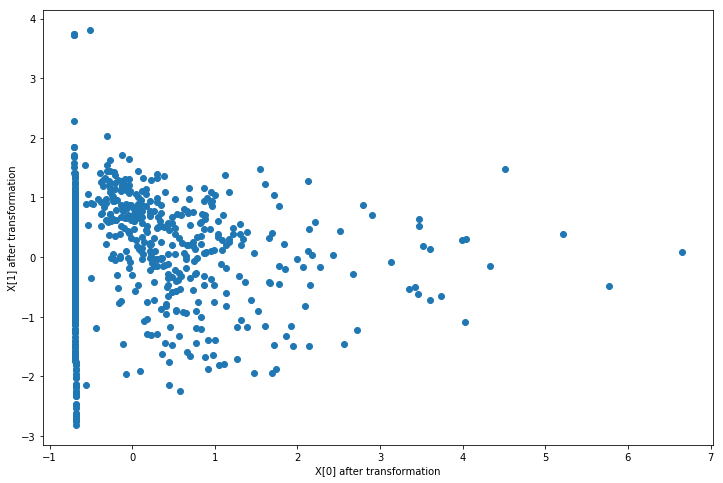

In [20]:
figure = plt.figure(figsize = (12, 8))

plt.scatter(transform_x_final[0], transform_x_final[1], cmap = 'Spectral')

plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');